IMPORTS BEFORE RUNNING CODE BELOW

In [55]:
import tensorflow.keras.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
import linear_models.softmaxreg as softmaxreg
import umap
import matplotlib.pyplot as plt
import numpy as np
import metrics.metrics as metrics

TRAINING MODEL USING THE IMAGES

In [65]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print ('{} {}'.format(x_train.shape, x_train.dtype))
print ('{} {}'.format(x_test.shape, x_train.dtype))
digit = x_train[0,:,:]
print(digit.shape)

(60000, 28, 28) uint8
(10000, 28, 28) uint8
(28, 28)


In [66]:
#normalizamos/estandarizamos los datos
x_train_std = (x_train - x_train.mean()) / x_train.std()
x_test_std = (x_test - x_test.mean()) / x_test.std()

In [67]:
x_train_d_784 = x_train_std.reshape(60000,-1)
x_test_d_784 = x_test_std.reshape(10000,-1)

In [68]:
SM = softmaxreg.SoftmaxReg(10)

In [69]:
coeff = SM.fit(x_train_d_784, y_train)

it 0 acc 0.0981
it 10 acc 0.20911666666666667
it 20 acc 0.3374
it 30 acc 0.445
it 40 acc 0.5223166666666667
it 50 acc 0.5771166666666666
it 60 acc 0.6181666666666666
it 70 acc 0.6489333333333334
it 80 acc 0.6729333333333334
it 90 acc 0.69305
it 100 acc 0.7099833333333333
it 110 acc 0.7247333333333333
it 120 acc 0.7371833333333333
it 130 acc 0.7480333333333333
it 140 acc 0.7567333333333334
it 150 acc 0.7645166666666666
it 160 acc 0.7715666666666666
it 170 acc 0.7780833333333333
it 180 acc 0.784
it 190 acc 0.7890833333333334


In [70]:
y_pred = SM.predict(x_test_d_784)

In [71]:
acc = metrics.multiclass_accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8


In [72]:
cm = metrics.confusion_matrix(y_test, y_pred, 10)
print(f'Confusion Matrix\n{cm}')

Confusion Matrix
[[ 880    0    7    3    1   43   28    2   10    6]
 [   0 1072   13   13    8    3    2    0   24    0]
 [  35   35  782   31   26    2   30   16   62   13]
 [   8    7   37  804    4   80    9   25   30    6]
 [  11   10   11    4  777   12   30    8   19  100]
 [  19   20   21   68   38  579   21   33   62   31]
 [  21    7   28    3   39   28  809    2   16    5]
 [   6   32   35    8   12   10    3  841    6   75]
 [   7   21   32   44   20   79   23   14  687   47]
 [  15   14   10   12   71   28    7   65   18  769]]


UMAP
(60000, 2)


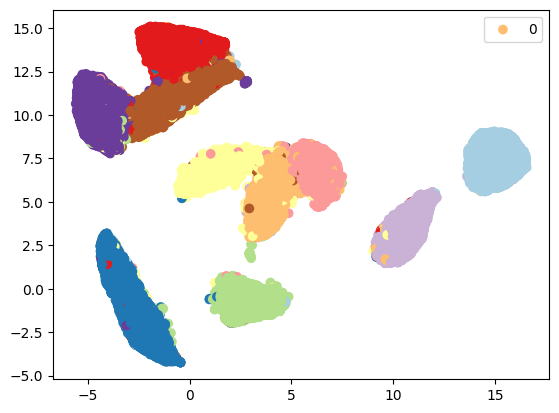

In [75]:
#2d visualization
reducer = umap.UMAP()
print('UMAP', flush = True)
reducer.fit(x_train_d_784) 
embedding = reducer.transform(x_train_d_784)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap='Paired')
plt.show()

TRAINING MODEL USING HOG FUNCTION

In [76]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print ('{} {}'.format(x_train.shape, x_train.dtype))
print ('{} {}'.format(x_test.shape, x_train.dtype))
digit = x_train[0,:,:]
print(digit.shape)

(60000, 28, 28) uint8
(10000, 28, 28) uint8
(28, 28)


In [77]:
#normalizamos/estandarizamos los datos
x_train_std = (x_train - x_train.mean()) / x_train.std()
x_test_std = (x_test - x_test.mean()) / x_test.std()
print(x_test_std.shape)
print(x_train_std.shape)

(10000, 28, 28)
(60000, 28, 28)


In [78]:
SM = softmaxreg.SoftmaxReg(10)

In [79]:
x_train_hog = list()
for n in range(len(x_train_std)):
    digit = x_train_std[n,:,:]
    fd = hog(digit, orientations=8, pixels_per_cell=(7,7), cells_per_block=(1, 1), visualize=False)
    x_train_hog.append(fd)
    if(n%9999 == 0): print(f"{round(n/len(x_train_std)*100)}%")
x_train_hog = np.array(x_train_hog)

0%
17%
33%
50%
67%
83%
100%


In [80]:
x_test_hog = list()
for n in range(len(x_test_std)):
    digit = x_test_std[n,:,:]
    fd = hog(digit, orientations=8, pixels_per_cell=(7,7), cells_per_block=(1, 1), visualize=False)
    x_test_hog.append(fd)
    if(n%999 == 0): print(f"{round(n/len(x_test_std)*100)}%")
x_test_hog = np.array(x_test_hog)

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [81]:
coeff = SM.fit(x_train_hog, y_train)
y_pred = SM.predict(x_test_hog)

it 0 acc 0.0683
it 10 acc 0.08035
it 20 acc 0.09421666666666667
it 30 acc 0.10973333333333334
it 40 acc 0.12648333333333334
it 50 acc 0.14268333333333333
it 60 acc 0.15931666666666666
it 70 acc 0.17505
it 80 acc 0.19016666666666668
it 90 acc 0.2054
it 100 acc 0.22245
it 110 acc 0.23653333333333335
it 120 acc 0.25178333333333336
it 130 acc 0.2656833333333333
it 140 acc 0.27935
it 150 acc 0.29355
it 160 acc 0.30665
it 170 acc 0.32015
it 180 acc 0.3329166666666667
it 190 acc 0.34553333333333336


In [82]:
acc = metrics.multiclass_accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.3638


In [83]:
cm = metrics.confusion_matrix(y_test, y_pred, 10)
print(f'Confusion Matrix\n{cm}')

Confusion Matrix
[[674  26  27  54  20  60 106   4   7   2]
 [ 11 737 139   3 197  35   5   3   4   1]
 [370 106 350  63   6  17  10   3  59  48]
 [404  39 166 198  33  95  13   1  16  45]
 [ 59  96 307  14 282  57  39  69  54   5]
 [171   9 150 224  13 216  82   2  23   2]
 [ 74  32  51  32  10  34 722   1   2   0]
 [159  49  55   7 130  82   7 312  83 144]
 [148 118 121  67  36 345  26   4 102   7]
 [216  94 127  47 169 101  28 145  37  45]]


UMAP
(60000, 2)


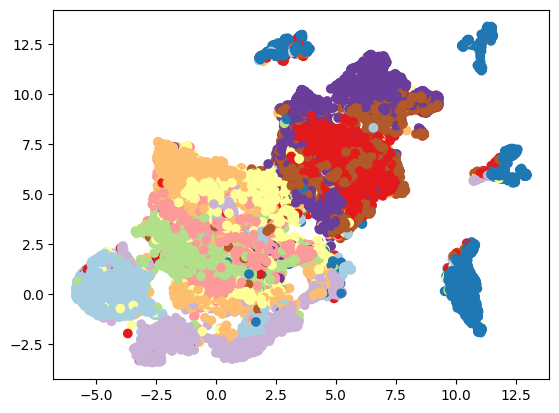

In [84]:
#2d visualization
reducer = umap.UMAP()
print('UMAP', flush = True)
reducer.fit(x_train_hog) 
embedding = reducer.transform(x_train_hog)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap='Paired')
plt.show()